In [1]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

from definitions import *  # imports all functions from definitions.py

# from definitions import plotting_routine

xr.set_options(
    keep_attrs=True, display_style="html"
)  # Attributes of DataArrays will be kept through operations.
plt.rcParams["font.size"] = "22"


alt = [
    70,
    72,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    92,
    94,
    96,
    98,
    100,
    102,
    104,
    106,
    108,
    110,
    112,
    114,
    116,
    118,
    120,
]
root_path = "/home/gemeinsam_tmp/UA_students/data/"
dir_path = "/home/hochatmstud/bene/"

In [2]:
def read_group(gruppe, loc):
    station = loc  # ersten Buchstaben bitte bitte groß schreiben

    if loc == "Rio":
        timestart = "2008-02-01"
        timeend = "2020-12-31"
    elif loc == "Col":
        timestart = "2004-08-01"
        timeend = "2020-12-31"
    elif loc == "CMA":
        timestart = "2002-01-01"
        timeend = "2020-11-30"
    elif loc == "Dav":
        timestart = "2005-01-01"
        timeend = "2020-12-31"
    elif loc == "Kir":
        timestart = "1999-08-01"
        timeend = "2020-12-31"
    elif loc == "SES":
        timestart = "1999-08-01"
        timeend = "2020-12-31"
    elif loc == "Sod":
        timestart = "2008-10-01"
        timeend = "2020-12-31"

    infiles = f"{root_path}{station}/Meteor_radar_{station}_GW_*.h5"
    if gruppe == "tides":
        ds = xr.open_mfdataset(
            infiles,
            concat_dim="phony_dim_4",
            group=gruppe,
            combine="nested",
            parallel=True,
        )
        ds = ds.rename({"phony_dim_4": "time", "phony_dim_5": "alt"})
    else:
        ds = xr.open_mfdataset(
            infiles,
            concat_dim="phony_dim_6",
            group=gruppe,
            combine="nested",
            parallel=True,
        )
        ds = ds.rename({"phony_dim_6": "time", "phony_dim_7": "alt"})
    ds["alt"] = alt
    ds["alt"].attrs["units"] = "km"
    # change time range according to meteor radar station
    ds["time"] = pd.date_range(start=timestart, end=timeend, periods=ds.time.shape[0])
    return ds

In [3]:
def read_var(gruppe, var):
    varout = gruppe[var]
    return varout

In [4]:
station = "RioGrande"
station_name = "Rio"

In [5]:
root_path

'/home/gemeinsam_tmp/UA_students/data/'

## Terdiurnal tides

In [6]:
ds_tides = read_group("tides", station_name)

t8_u = read_var(ds_tides, "A8u")
t8_v = read_var(ds_tides, "A8v")

t8_u.attrs["units"] = t8_u.attrs["zonal terdiurnal amplitude"]
t8_v.attrs["units"] = t8_v.attrs["merid terdiurnal amplitude"]

t8_u_anomalie = anomalie("dayofyear", t8_u)

t8_v_anomalie = anomalie("dayofyear", t8_v)

sea_t8_u = sea(40, station, t8_u)
sea_t8_u_anomalie = sea(40, station, t8_u_anomalie)

sea_t8_v = sea(40, station, t8_v)
sea_t8_v_anomalie = sea(40, station, t8_v_anomalie)

In [7]:
sea_t8_u

,Array,Chunk
Bytes,16.85 kB,208 B
Shape,"(81, 26)","(1, 26)"
Count,1209 Tasks,81 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,16.85 kB,208 B
Shape,"(81, 26)","(1, 26)"
Count,1290 Tasks,81 Chunks
Type,float64,numpy.ndarray


In [8]:
t8_v

,Array,Chunk
Bytes,23.71 MB,154.75 kB
Shape,"(113976, 26)","(744, 26)"
Count,468 Tasks,156 Chunks
Type,float64,numpy.ndarray


In [9]:
ds_tides

,Array,Chunk
Bytes,23.71 MB,154.75 kB
Shape,"(113976, 26)","(744, 26)"
Count,468 Tasks,156 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,23.71 MB,154.75 kB
Shape,"(113976, 26)","(744, 26)"
Count,468 Tasks,156 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


### Zonal

#### Climatology

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


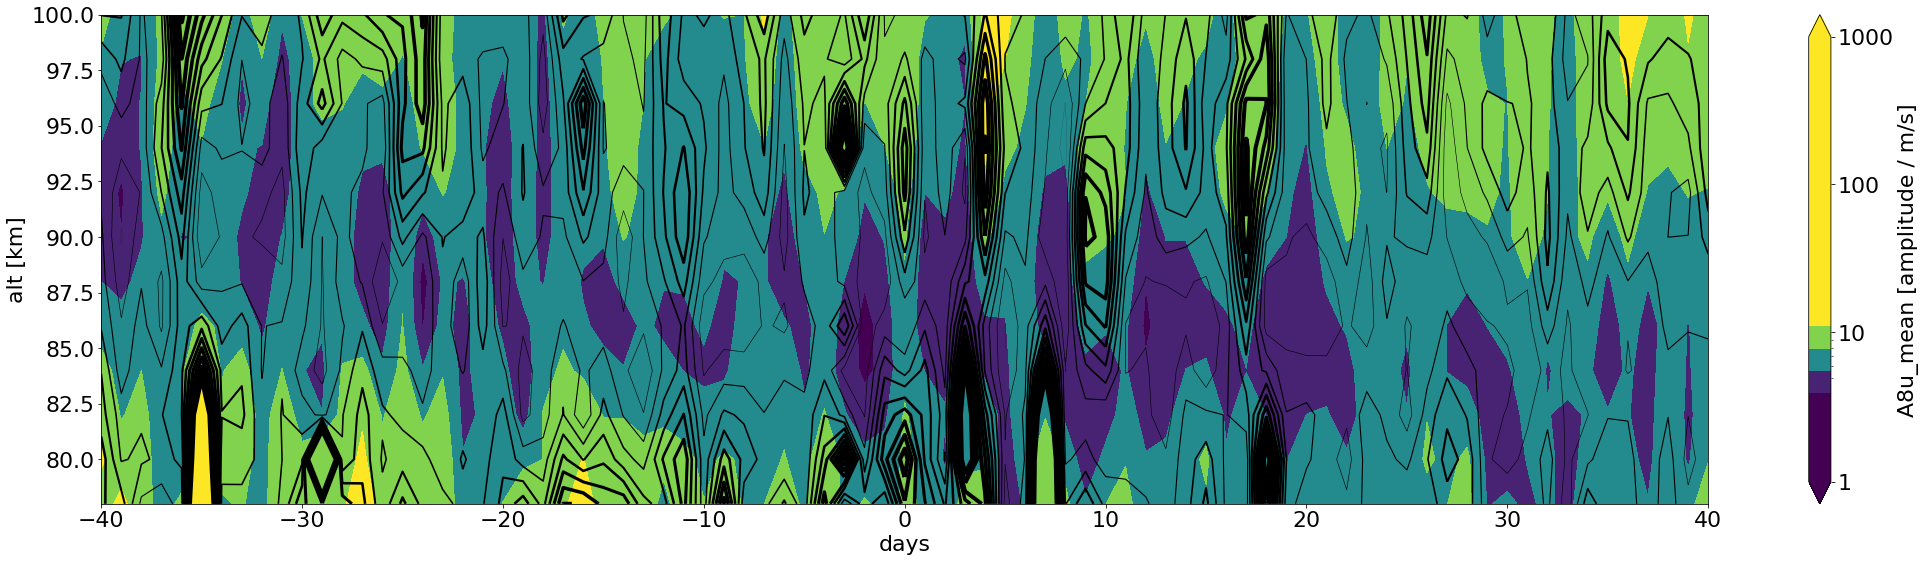

In [10]:
plotting_routine(sea_t8_u, "A8u", log=True)

#### Anomalies

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


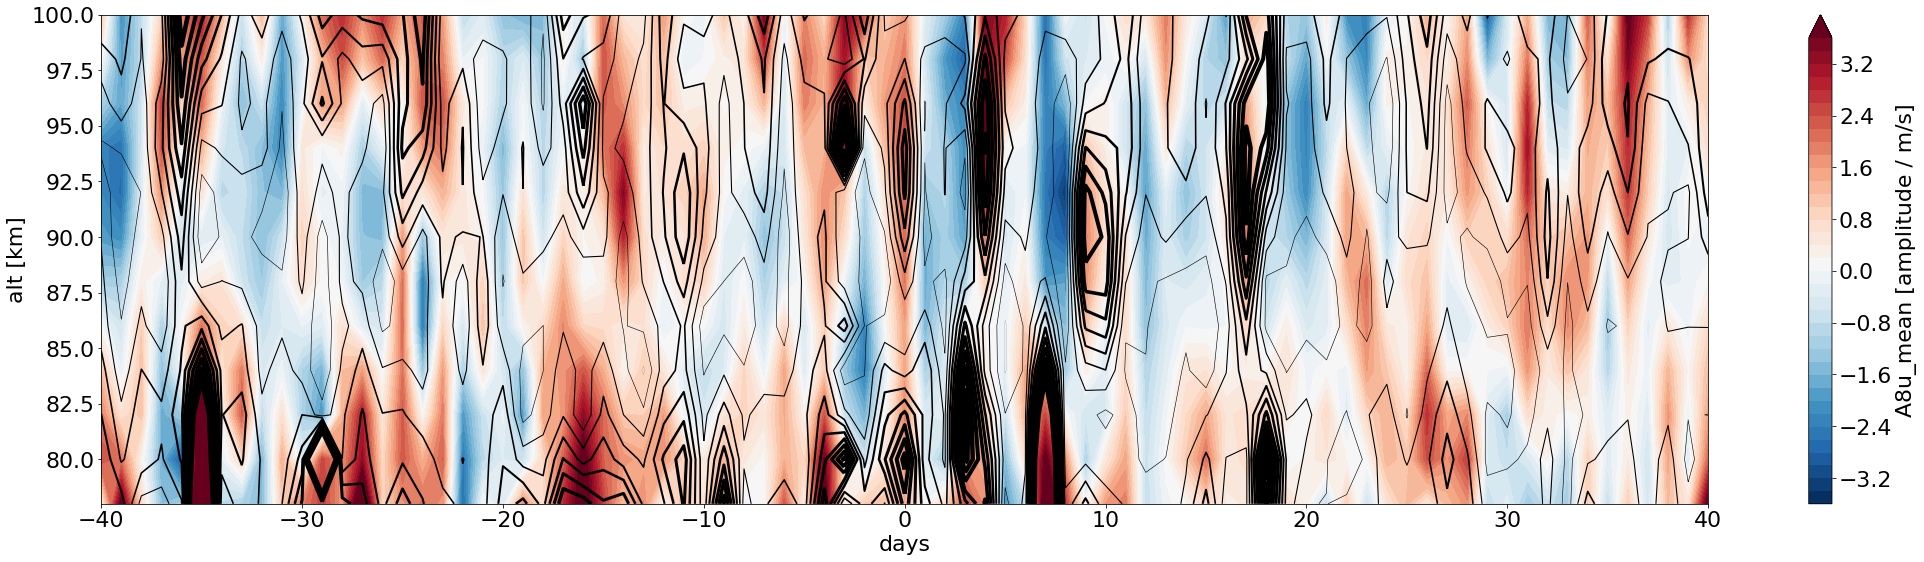

In [11]:
plotting_routine(sea_t8_u_anomalie, "A8u")

### Meridional

#### Climatology

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


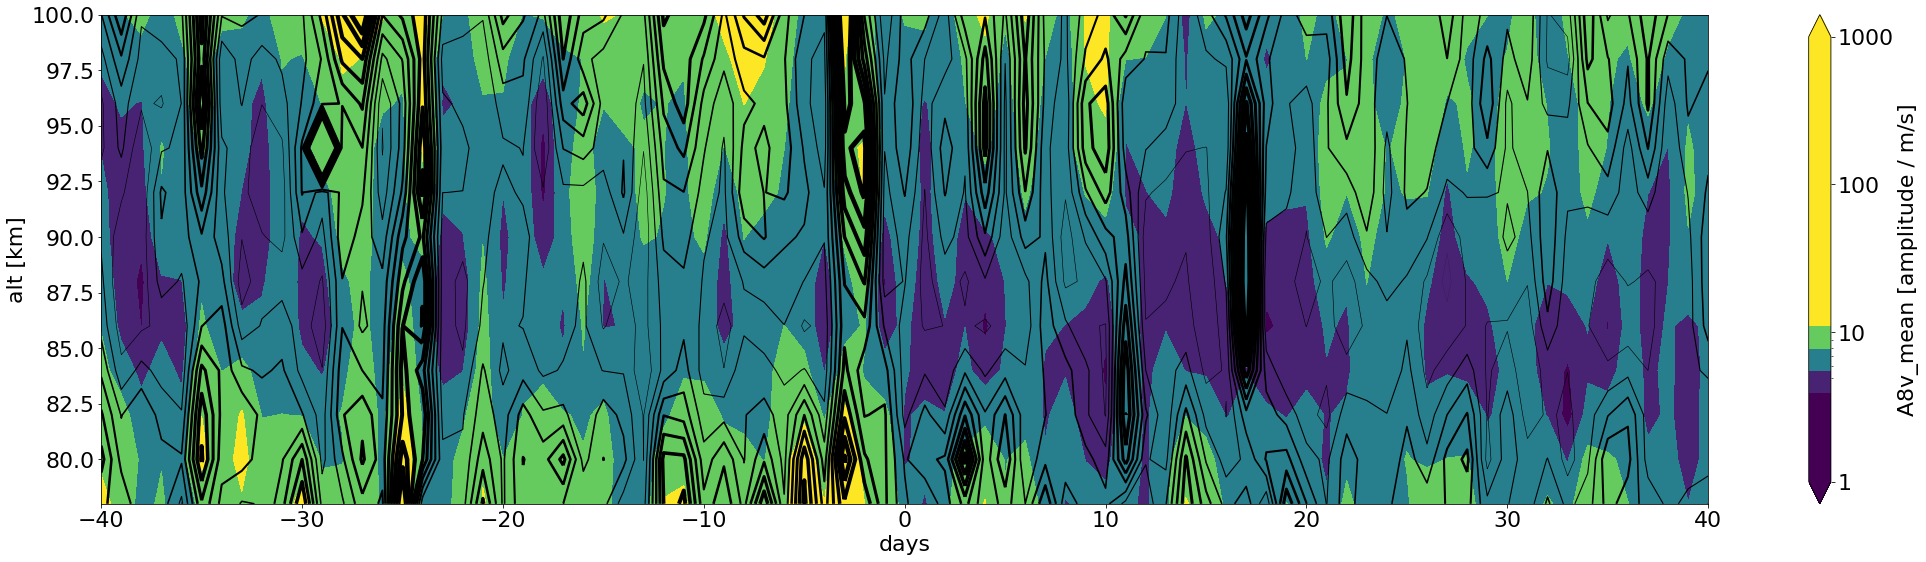

In [12]:
plotting_routine(sea_t8_v, "A8v", log=True)

#### Anomalies

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


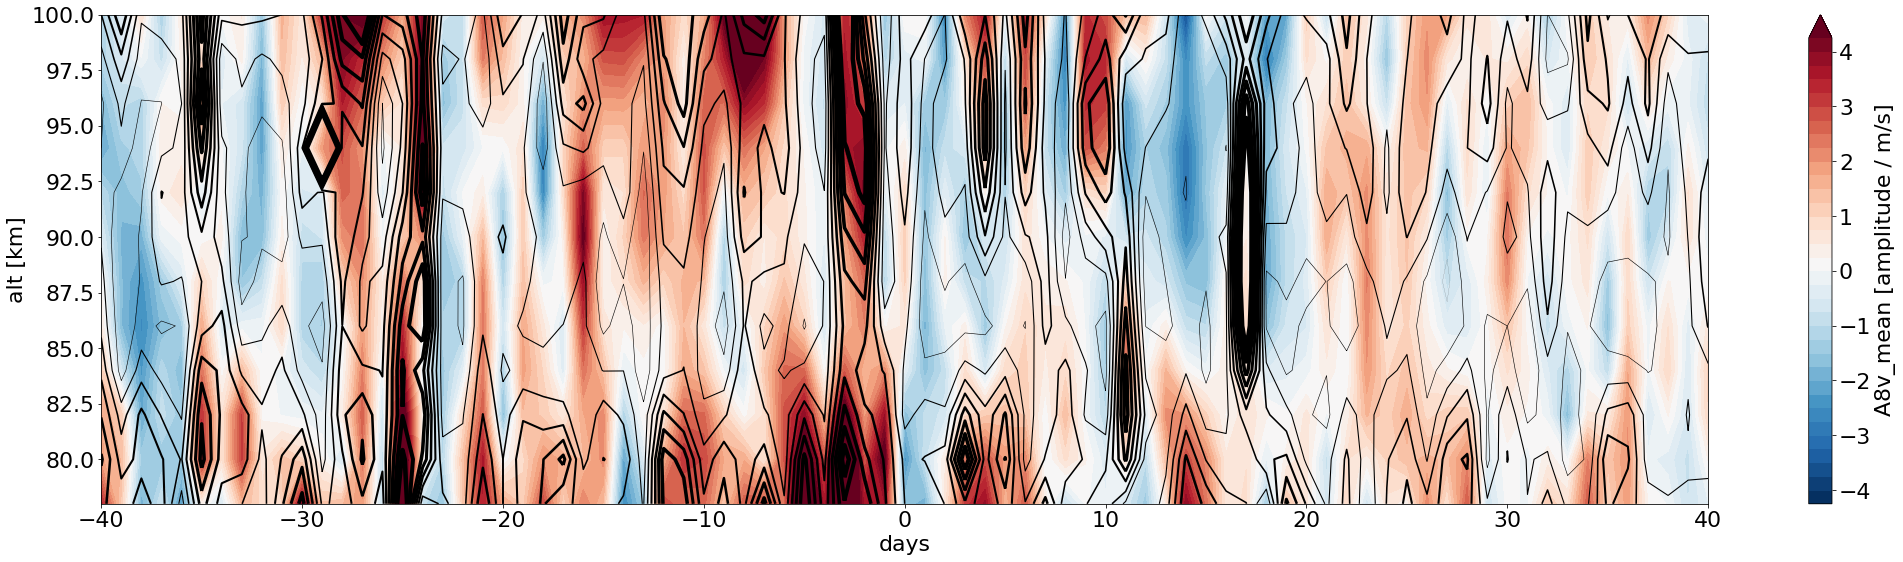

In [13]:
plotting_routine(sea_t8_v_anomalie, "A8v")